<a href="https://colab.research.google.com/github/Nouman97/Computer-Vision/blob/master/Human_Pose_Estimation_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digits Dataset

In [2]:
!wget http://ufldl.stanford.edu/housenumbers/train_32x32.mat
!wget http://ufldl.stanford.edu/housenumbers/test_32x32.mat

--2020-02-23 09:59:14--  http://ufldl.stanford.edu/housenumbers/train_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182040794 (174M) [text/plain]
Saving to: ‘train_32x32.mat’

train_32x32.mat     100%[===================>] 173.61M  20.2MB/s    in 11s     

2020-02-23 09:59:31 (15.6 MB/s) - ‘train_32x32.mat’ saved [182040794/182040794]

--2020-02-23 09:59:33--  http://ufldl.stanford.edu/housenumbers/test_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64275384 (61M) [text/plain]
Saving to: ‘test_32x32.mat’

test_32x32.mat      100%[===================>]  61.30M  14.4MB/s    in 5.6s    

2020-02-23 09:59:39 (11.0 MB/s) - ‘test_32x32.mat’ saved [64275384/64

In [3]:
import scipy.io
import numpy as np

test = scipy.io.loadmat('test_32x32.mat')
train = scipy.io.loadmat('train_32x32.mat')
print(test.keys())
print(train.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])
dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


In [4]:
print(test['X'].shape)
print(test['y'].shape)
print(train['X'].shape)
print(train['y'].shape)

(32, 32, 3, 26032)
(26032, 1)
(32, 32, 3, 73257)
(73257, 1)


In [5]:
X_test = np.array([test['X'][:, :, :, i] for i in range(test['X'].shape[-1])])
print(X_test.shape)
X_train = np.array([train['X'][:, :, :, i] for i in range(train['X'].shape[-1])])
print(X_train.shape)

(26032, 32, 32, 3)
(73257, 32, 32, 3)


In [6]:
y_train = train['y'].flatten()
y_test = test['y'].flatten()
print(y_train.shape)
print(y_test.shape)
print(np.unique(y_train))
y_train = np.array([i if i != 10 else 0 for i in y_train])
y_test = np.array([i if i != 10 else 0 for i in y_test])
print(np.unique(y_train))

(73257,)
(26032,)
[ 1  2  3  4  5  6  7  8  9 10]
[0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, '5')

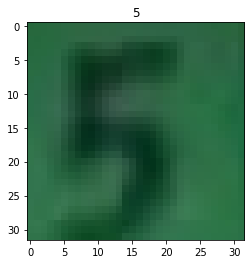

In [7]:
import matplotlib.pyplot as plt

plt.imshow(X_test[0])
plt.title(str(y_test[0]))

# COCO Dataset

In [8]:
# This code downloads the coco dataset from Amazon S3 in parallel.
import boto3
from botocore import UNSIGNED
from botocore.client import Config
import multiprocessing
import subprocess
files = ['val2017.zip', 'annotations_trainval2017.zip']# , 'train2017.zip']

s3 = boto3.client('s3', config=Config(signature_version=UNSIGNED))
def download_and_unzip_from_s3(file_name, bucket_name='fast-ai-coco'):
    print("Downloading", file_name)
    s3.download_file(bucket_name, file_name, file_name)
    print("Finished downloading", file_name, ". Starting to unzip.")
    subprocess.run(["unzip", file_name])
    print("Finished unzipping", file_name)

# Download in parallel
num_cpus = multiprocessing.cpu_count()
with multiprocessing.Pool(num_cpus) as p:
    p.map(download_and_unzip_from_s3, files)

print("Done transferring all datasets")

Finished downloading annotations_trainval2017.zip . Starting to unzip.
Finished downloading val2017.zip . Starting to unzip.
Finished unzipping annotations_trainval2017.zip
Finished unzipping val2017.zip
Done transferring all datasets


(428, 640, 3)


Text(0.5, 1.0, 'val2017/000000509735.jpg')

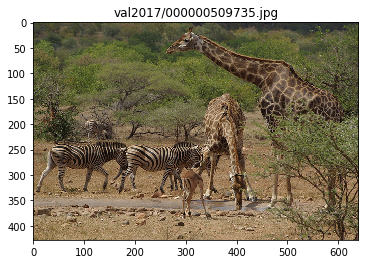

In [19]:
import os
import cv2

img = cv2.imread("val2017/" + os.listdir("val2017")[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)
plt.imshow(img)
plt.title("val2017/" + os.listdir("val2017")[0])

In [0]:
import json

with open("annotations/person_keypoints_val2017.json",encoding='utf-8', errors='ignore') as json_data:
     data = json.load(json_data, strict=False)

In [75]:
print(data.keys())

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])


In [93]:
print(data['annotations'][0].keys())

dict_keys(['segmentation', 'num_keypoints', 'area', 'iscrowd', 'keypoints', 'image_id', 'bbox', 'category_id', 'id'])


In [92]:
print(data['annotations'][0])

{'segmentation': [[125.12, 539.69, 140.94, 522.43, 100.67, 496.54, 84.85, 469.21, 73.35, 450.52, 104.99, 342.65, 168.27, 290.88, 179.78, 288, 189.84, 286.56, 191.28, 260.67, 202.79, 240.54, 221.48, 237.66, 248.81, 243.42, 257.44, 256.36, 253.12, 262.11, 253.12, 275.06, 299.15, 233.35, 329.35, 207.46, 355.24, 206.02, 363.87, 206.02, 365.3, 210.34, 373.93, 221.84, 363.87, 226.16, 363.87, 237.66, 350.92, 237.66, 332.22, 234.79, 314.97, 249.17, 271.82, 313.89, 253.12, 326.83, 227.24, 352.72, 214.29, 357.03, 212.85, 372.85, 208.54, 395.87, 228.67, 414.56, 245.93, 421.75, 266.07, 424.63, 276.13, 437.57, 266.07, 450.52, 284.76, 464.9, 286.2, 479.28, 291.96, 489.35, 310.65, 512.36, 284.76, 549.75, 244.49, 522.43, 215.73, 546.88, 199.91, 558.38, 204.22, 565.57, 189.84, 568.45, 184.09, 575.64, 172.58, 578.52, 145.26, 567.01, 117.93, 551.19, 133.75, 532.49]], 'num_keypoints': 10, 'area': 47803.27955, 'iscrowd': 0, 'keypoints': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 142, 309, 1, 177, 320, 2

In [97]:
print(data['annotations'][0]['image_id'])

425226


In [101]:
box = data['annotations'][0]['bbox']
print(data['annotations'][0]['bbox'])
(x1, y1, x2, y2) = int(box[0]), int(box[1]), int(box[0]) + int(box[2]), int(box[1]) + int(box[3])
print(x1, y1, x2, y2)

[73.35, 206.02, 300.58, 372.5]
73 206 373 578


In [106]:
print(data['categories'][0]['keypoints'])

['nose', 'left_eye', 'right_eye', 'left_ear', 'right_ear', 'left_shoulder', 'right_shoulder', 'left_elbow', 'right_elbow', 'left_wrist', 'right_wrist', 'left_hip', 'right_hip', 'left_knee', 'right_knee', 'left_ankle', 'right_ankle']


In [102]:
print(data['annotations'][0]['keypoints'])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 142, 309, 1, 177, 320, 2, 191, 398, 2, 237, 317, 2, 233, 426, 2, 306, 233, 2, 92, 452, 2, 123, 468, 2, 0, 0, 0, 251, 469, 2, 0, 0, 0, 162, 551, 2]


In [112]:
key_diction = dict()

print(data['categories'][0]['keypoints'])
for i in range(0, len(data['annotations'][0]['keypoints']), 3):
  key_diction[data['categories'][0]['keypoints'][i // 3]] = [data['annotations'][0]['keypoints'][i], data['annotations'][0]['keypoints'][i + 1], data['annotations'][0]['keypoints'][i + 2]]

print(key_diction)

['nose', 'left_eye', 'right_eye', 'left_ear', 'right_ear', 'left_shoulder', 'right_shoulder', 'left_elbow', 'right_elbow', 'left_wrist', 'right_wrist', 'left_hip', 'right_hip', 'left_knee', 'right_knee', 'left_ankle', 'right_ankle']
{'nose': [0, 0, 0], 'left_eye': [0, 0, 0], 'right_eye': [0, 0, 0], 'left_ear': [0, 0, 0], 'right_ear': [0, 0, 0], 'left_shoulder': [142, 309, 1], 'right_shoulder': [177, 320, 2], 'left_elbow': [191, 398, 2], 'right_elbow': [237, 317, 2], 'left_wrist': [233, 426, 2], 'right_wrist': [306, 233, 2], 'left_hip': [92, 452, 2], 'right_hip': [123, 468, 2], 'left_knee': [0, 0, 0], 'right_knee': [251, 469, 2], 'left_ankle': [0, 0, 0], 'right_ankle': [162, 551, 2]}


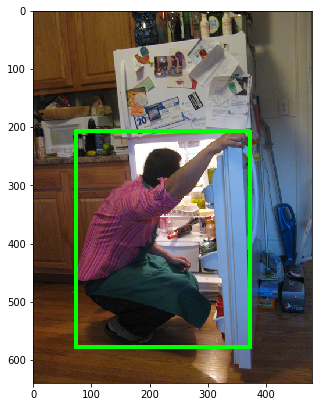

In [146]:
a = cv2.imread("val2017/000000{}.jpg".format(data['annotations'][0]['image_id']))
a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
c = a.copy()

plt.figure(figsize = (5, 10))

c = cv2.rectangle(c, (x1, y1), (x2, y2), (0, 255, 0), 5)
    
plt.imshow(c) 

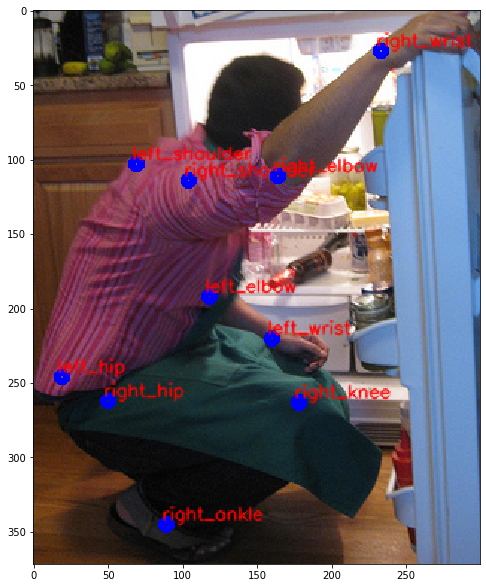

In [147]:
d = a[y1:y2, x1:x2]
for i in key_diction:
  key = key_diction[i]
  if key[2] != 0:
    d = cv2.circle(d, (key[0] - x1, key[1] - y1), 3, (0, 0, 255), 3)
    d = cv2.putText(d, i, (key[0] - 3 - x1, key[1] - 3 - y1), 0, 0.4, (255, 0, 0), 1, cv2.LINE_AA)

plt.figure(figsize = (8, 16))
plt.imshow(d)